# ObsID : 0945020136, SRCNUM : 4, Instru : EMOS1
**Simbad :** Galaxy (2dFGRS TGS322Z047) https://simbad.cds.unistra.fr/simbad/sim-id?Ident=%404738151&Name=2dFGRS%20TGS322Z047&submit=submit

In [1]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

Fit.statMethod = "cstat"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


## Load files

In [5]:
spec  = Spectrum(glob.glob('ObsID*_SRCNUM*_E*_spectrum_grp_cstat.fits')[0])


2 spectra  in use
 
Spectral Data File: ObsID0945020136_SRCNUM4_EMOS2_spectrum_grp_cstat.fits  Spectrum 2
Net count rate (cts/s) for Spectrum:2  7.295e-03 +/- 1.203e-03 (71.9 % total)
 Assigned to Data Group 1 and Plot Group 2
  Noticed Channels:  1-75
  Telescope: XMM Instrument: EMOS2  Channel Type: PI
  Exposure Time: 7690 sec
 Using fit statistic: cstat
 Using Background File                ObsID0945020136_SRCNUM4_EMOS2_background_spectrum.fits
  Background Exposure Time: 7690 sec
 Using Response (RMF) File            ObsID0945020136_SRCNUM4_EMOS2.rmf for Source 1
 Using Auxiliary Response (ARF) File  ObsID0945020136_SRCNUM4_EMOS2.arf



In [3]:
print("Number of counts :", 7.295e-03*7690)

Number of counts : 56.09855


The low number of counts indicates that using cstat fit method could be better.

## Plot spectrum

In [6]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.05")
Plot("data")
spec.ignore("**-0.2 12-**")

     5 channels (1-5) ignored in spectrum #     2
    64 channels (12,75) ignored in spectrum #     2



(-0.5, 854.5, 661.5, -0.5)

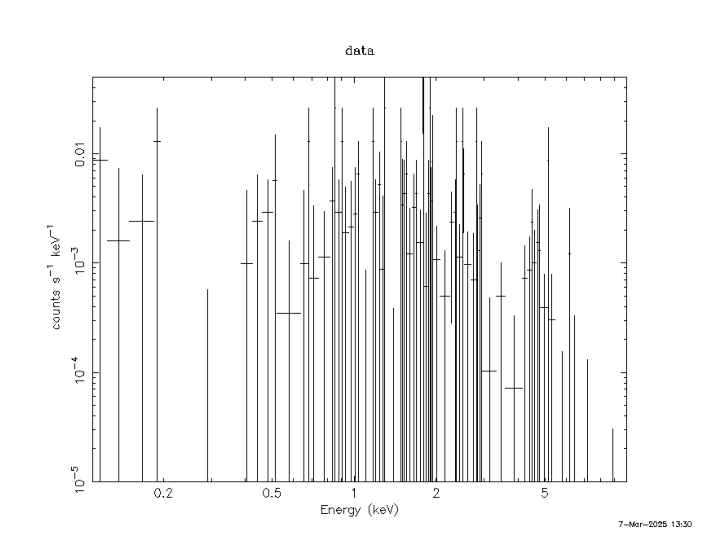

In [11]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum2.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model

In [7]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
plt.show()


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : C-Statistic              4.207625e+06     using 75 bins, spe

(-0.5, 860.5, 657.5, -0.5)

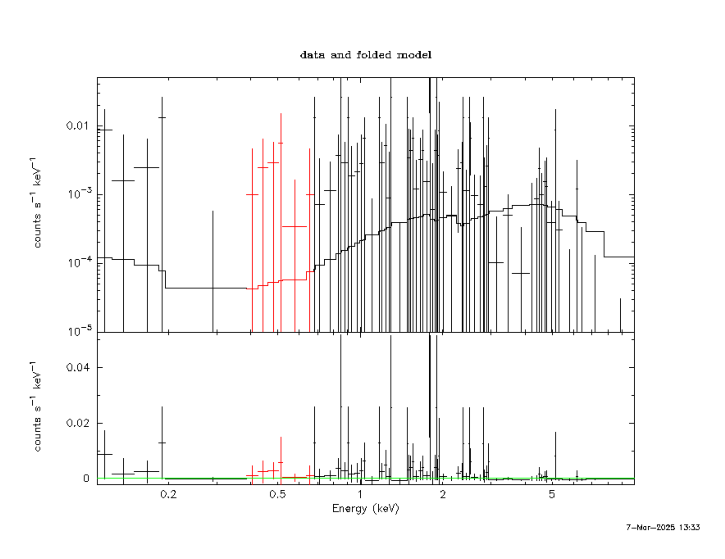

In [9]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bbody2.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model

In [10]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              1.044843e+06     using 75 bins, spectrum 1.
                 C-Statistic                3822.052     using 6 bins, spectrum 2.
Total fit statistic                       1.048665e+06     with 78 d.o.f.

Test statistic : Chi-Squared              8.426741e+09     using 81 bins.
 Null hypothesis probability of 0.000000e+00 with 78 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        3:norm
281390       196030       -3      0.461661  

(-0.5, 855.5, 659.5, -0.5)

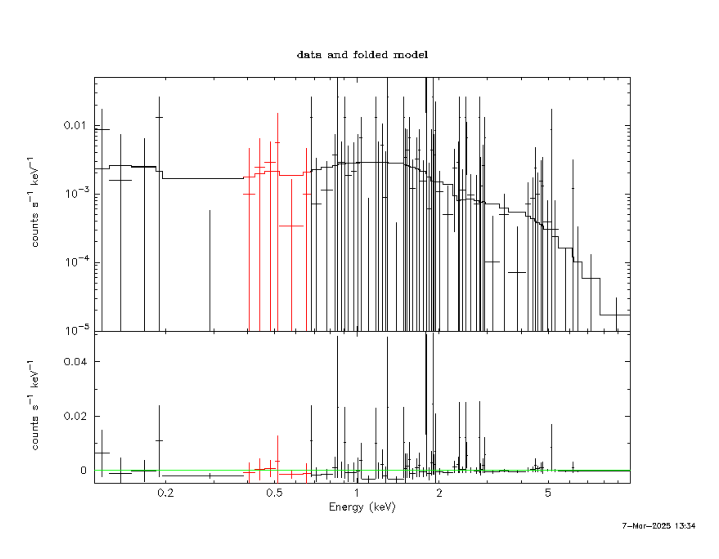

In [12]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bremss2.png')[0])
plt.imshow(img)
plt.axis('off')

### Apec model

In [13]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : C-Statistic                394002.2     using 75 bins, spectrum 1.
                 C-Statistic                2914.651     using 6 bins, spectrum 2.
Total fit statistic                         396916.9     with 78 d.o.f.

Test statistic : Chi-Squared              1.585806e+09     using 81 bins.
 Null hypothesis probability of 0.000000e+00 with 78 degrees of freedom
 Current data and model not fit yet.
           

(-0.5, 857.5, 665.5, -0.5)

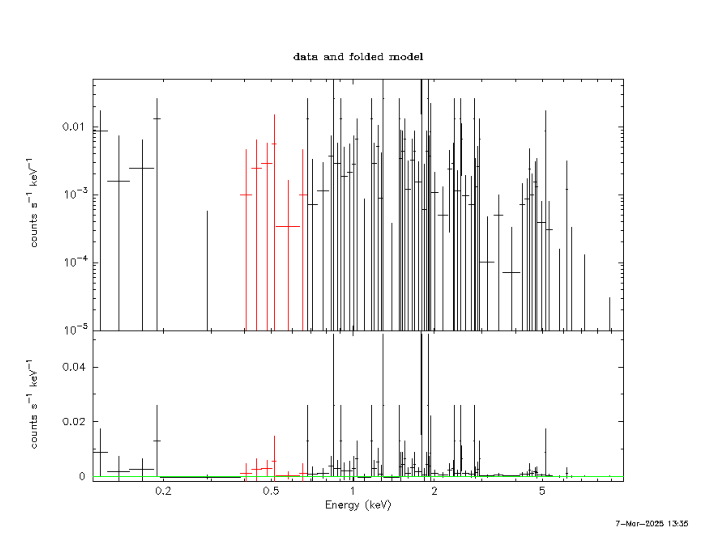

In [14]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_apec2.png')[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model

In [15]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              2.498803e+06     using 75 bins, spectrum 1.
                 C-Statistic                7102.793     using 6 bins, spectrum 2.
Total fit statistic                       2.505906e+06     with 78 d.o.f.

Test statistic : Chi-Squared              5.038469e+10     using 81 bins.
 Null hypothesis probability of 0.000000e+00 with 78 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
17168.6      627881       -1      0.163312

(-0.5, 856.5, 660.5, -0.5)

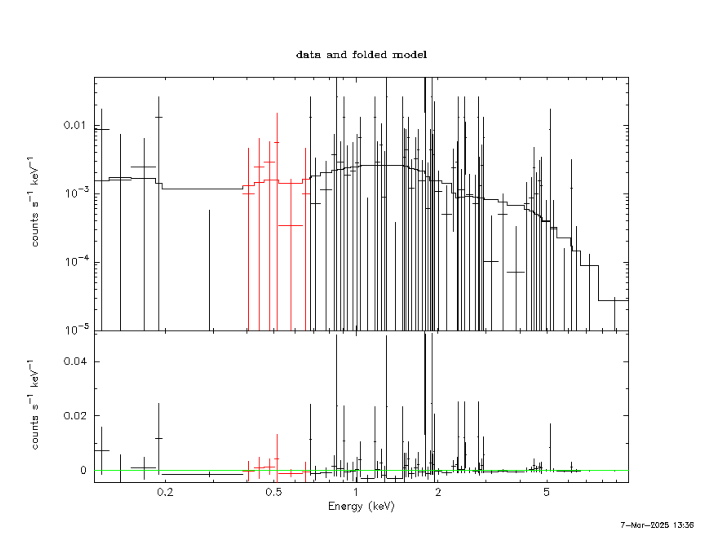

In [16]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_powerlaw2.png')[0])
plt.imshow(img)
plt.axis('off')

### ESASky

https://sky.esa.int/esasky/?target=52.97008333333333%20-28.304833333333328&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr

``EPIC Stack``

- Stack Catalogue name : 4XMMs J033152.7-281818
- IAU name : 4XMM J033152.7-281818
- RA : 03h 31m 52.751s
- DEC : -28° 18' 18.16"

``GAIA``

- Designation : Gaia DR3 5057378691743871360
- RA : 03h 31m 52.742s
- DEC : -28° 18' 18.52"
- Parallax : -0.7065 mas
- Magnitude G (mag) : 19.6328

``GLADE``

- No : 2 124 866
- RA : 03h 31m 52.754s
- DEC : -28° 18' 18.08"
- Distance : 289.8972 Mpc

``2MASS``

- Name : 03315275-2818185
- RA : 03h 31m 52.751s
- DEC : -28° 18' 18.57"

## Column density nH
### 3DNH-tool
http://astro.uni-tuebingen.de/nh3d/nhtool

**Sky coordinates (°) :** from ESASky

- RA = 52.9697976°
- Dec = -28.3050451°

53.97 -28.31

**Column density :** nH = 3*10^20 cm^-2

The different models give a column density of :

- bbdoy : nH = 2.02585*10^5
- bremss : nH = 2.24781*10^3
- apec : nH = 197.152*10^22
- powerlaw : nH = 2.28538*10^7

None of the models' column density value corresponds to the 3DNH-tool's one.

## Flux
### X-ray flux

In [17]:
AllModels.calcFlux(".2 12.0")

Spectrum Number: 1, 2
Data Group Number: 1
 Model Flux 8.2107e-05 photons (4.1238e-13 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [18]:
Flux = 4.1238e-13 # ergs/cm^2/s
print(color.BOLD+"X-ray  flux : "+color.END+f"F_X = {Flux} ergs/cm^2/s")

X-ray  flux : F_X = 4.1238e-13 ergs/cm^2/s


### Optical flux

In [19]:
def F_optical(mag):
    F0 = 2.5*10**(-6) # Flux de référence en ergs/cm^2/s correspondant à une magnitude nulle dans la bande concernée, ici G.
    return F0*10**(-0.4*mag)
    
G = 19.6328

F = F_optical(G)

print(color.BOLD+"Optical  flux : "+color.END+f"F_opt = {F} ergs/cm^2/s")

Optical  flux : F_opt = 3.506065365891605e-14 ergs/cm^2/s


### X-ray flux / Optical flux ratio

In [20]:
print(color.BOLD+"X-ray flux / Optical flux ratio : "+color.END+f"F_x-ray/F_optical = {Flux/F}")
print(f"F_x-ray = {Flux/F}*F_optical")

X-ray flux / Optical flux ratio : F_x-ray/F_optical = 11.76190278743221
F_x-ray = 11.76190278743221*F_optical


### Luminosity

In [21]:
"""GAIA"""

P_mas = 0.7065 # Parallaxe en mas
d_kpc = 1/P_mas # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity = 4*np.pi*Flux*(d_cm)**2 # erg/s

print(color.BOLD+"(GAIA)"+color.END)
print(f"Distance : {d_cm} cm")
print(f"Luminosité : {Luminosity} erg/s")
print()

"""GLADE"""

d_kpc = 289897.2 # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity = 4*np.pi*Flux*(d_cm)**2 # erg/s

print(color.BOLD+"(GLADE)"+color.END)
print(f"Distance : {d_cm} cm")
print(f"Luminosité : {Luminosity} erg/s")

(GAIA)
Distance : 4.3675866949752303e+21 cm
Luminosité : 9.885315321070202e+31 erg/s

(GLADE)
Distance : 8.945357900400001e+26 cm
Luminosité : 4.1467027116673983e+42 erg/s
